# Machine Learning Recipes

Covers:

1. Decision Trees
2. Visualising Trees
3. K-Nearest Neighbours
4. Splitting training and testing datasets

Sidenote: If you want to visualise the decision tree, you'll need to install the following libraries. I used brew to install graphviz. I used homebrew on Mac, but you could also use a package manger on Linux:
```
brew install graphviz
pip3 install pydotplus
```

In [1]:
from sklearn import tree
features = [[140,1],[130,1],[150,0],[170,0]]
labels = [0,0,1,1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels)

print(clf.predict([[160, 0]]))

[1]


In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[ 5.1  3.5  1.4  0.2]


In [3]:
test_idx = [0,50,100]
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_target)

print(test_target)
print(clf.predict(test_data))

[0 1 2]
[0 1 2]


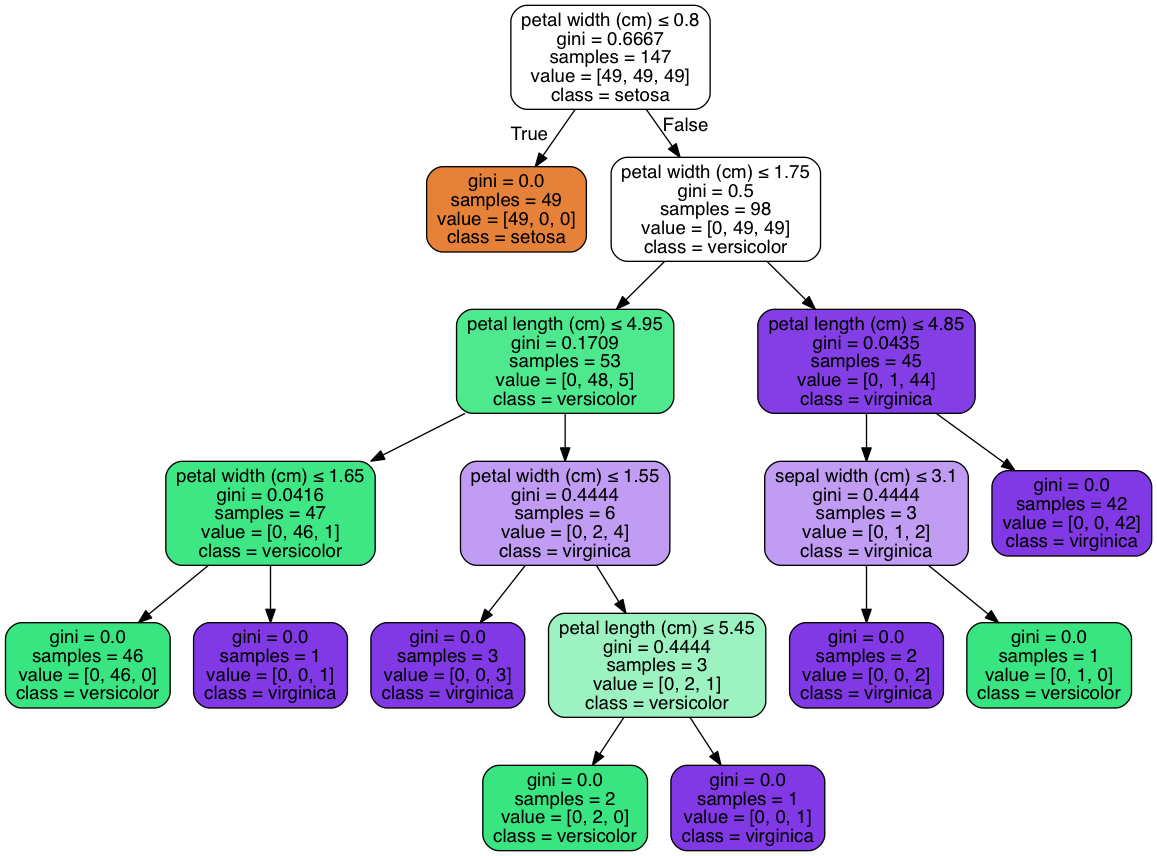

In [5]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

## Features
Classifiers are only as good as the features you provide. Ideal features are:

1. Informative
2. Indpendent
3. Simple

In [6]:
from sklearn import datasets
from sklearn import tree
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(predictions)

[0 1 1 2 2 2 2 1 1 2 0 2 2 2 2 2 2 1 1 0 0 1 2 2 1 2 2 2 1 0 1 0 1 1 1 0 1
 0 0 1 2 2 2 0 2 1 0 2 0 1 2 0 2 0 1 0 1 2 1 2 1 1 0 0 1 0 2 2 0 0 0 1 0 2
 1]
